{'point_processes': {}, 'density_mechs': {'hh': {'gnabar': [0.12], 'gkbar': [0.036], 'gl': [0.0003], 'el': [-54.3], 'gna': [0.0], 'gk': [0.0], 'il': [0.0], 'm': [0.0], 'h': [0.0], 'n': [0.0]}}, 'ions': {'na': {'ena': [50.0], 'nai': [10.0], 'nao': [140.0], 'ina': [0.0], 'dina_dv_': [0.0]}, 'k': {'ek': [-77.0], 'ki': [54.4], 'ko': [2.5], 'ik': [0.0], 'dik_dv_': [0.0]}}, 'morphology': {'L': 20.0, 'diam': [20.0], 'pts3d': [], 'parent': None, 'trueparent': None}, 'nseg': 1, 'Ra': 35.4, 'cm': [1.0], 'regions': set(), 'species': set(), 'name': 'soma', 'hoc_internal_name': '__nrnsec_0x280008420', 'cell': None}


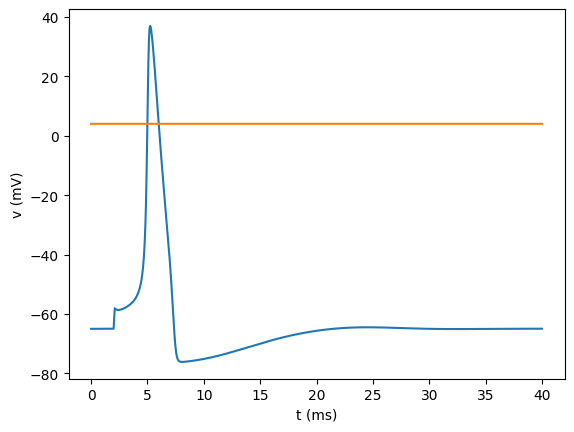

In [13]:
from neuron import h, rxd
from neuron.units import ms, mV
import matplotlib.pyplot as plt

%matplotlib inline

def main() -> None:
    soma = h.Section(name = 'soma')

    soma.L = 20
    soma.diam = 20
    soma.insert('hh')
    
    print(soma.psection())

    iclamp = h.IClamp(soma(0.5))

    iclamp.delay = 2
    iclamp.dur = 0.1
    iclamp.amp = 0.9
    
    
    v = h.Vector().record(soma(0.5)._ref_v)
    t = h.Vector().record(h._ref_t)
    i = h.Vector().record(h._ref_i)
    
    h.load_file('stdrun.hoc')
    h.finitialize(-65*mV)
    h.continuerun(40*ms)
    
    plt.figure()
    plt.plot(t, v)
    plt.plot(t, i)
    plt.xlabel("t (ms)")
    plt.ylabel("v (mV)")
    plt.show()
    
main()